In [1]:
import numpy as np

## 1. Основные статистики

In [2]:
"""
Пусть перед нами есть массив, необходимо найти индекс самого большого его элемента
"""

arr = np.array([1,5,3,4,8,2,1,5])

In [3]:
max(arr)

8

In [4]:
"""
Можно сделать так:
"""

m = max(arr)
ind = -1
for i in range(arr.shape[0]):
    if arr[i] == m:
        ind = i
        break

In [5]:
ind

4

In [6]:
"""
В математике эта операция называется argmax
"""

np.argmax(arr)

4

In [7]:
"""
Аналогично: минимум
"""

np.argmin(arr)

0

In [10]:
"""
Операцию можно сделать многомерной:
"""

arr = np.arange(16).reshape(-1,4)[::-1]
arr

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [11]:
arr.reshape(-1)

array([12, 13, 14, 15,  8,  9, 10, 11,  4,  5,  6,  7,  0,  1,  2,  3])

In [12]:
np.argmin(arr)

12

In [13]:
np.argmin(arr, axis=0)

array([3, 3, 3, 3], dtype=int64)

In [14]:
np.argmin(arr, axis=1)

array([0, 0, 0, 0], dtype=int64)

In [15]:
"""
Просто минимальное и максимальное значения: np.amin/np.amax
"""

np.amin(arr)

0

In [16]:
np.amax(arr)

15

In [17]:
"""
Зачем же нужны эти функции, если есть просто min и max?
"""

np.amin(arr, axis=0)

array([0, 1, 2, 3])

In [18]:
np.amin(arr, axis=1)

array([12,  8,  4,  0])

In [19]:
"""
Отступление: inf и nan
"""

nan_inf_arr = np.array([1, 2, np.inf, 4, 5, np.nan, 7, 8, np.nan])
nan_inf_arr

array([ 1.,  2., inf,  4.,  5., nan,  7.,  8., nan])

In [20]:
np.amin(nan_inf_arr)

nan

In [21]:
np.isinf(nan_inf_arr)

array([False, False,  True, False, False, False, False, False, False])

In [22]:
np.isnan(nan_inf_arr)

array([False, False, False, False, False,  True, False, False,  True])

In [23]:
np.amax(nan_inf_arr)

nan

In [24]:
np.nanmax(nan_inf_arr)

inf

In [25]:
np.nanmin(nan_inf_arr)

1.0

In [26]:
arr

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [27]:
"""
Диапазон
"""

np.ptp(arr)

15

In [28]:
np.ptp(arr, axis = 0)

array([12, 12, 12, 12])

In [29]:
np.ptp(arr, axis = 1)

array([3, 3, 3, 3])

## Перцентиль, Квантиль

<img src="Perc.PNG">

In [30]:
"""
Как мы можем посчитать это значение?
"""

perc = 60

array = np.random.randn(100_000)

In [31]:
array = np.sort(array)
ind = array.shape[0]*perc/100
ind = int(ind)
ind

60000

In [32]:
array[ind]

0.25204608809923357

In [33]:
from matplotlib import pyplot as plt

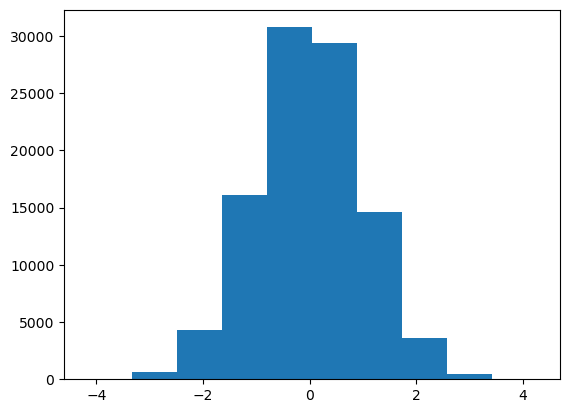

In [34]:
h = plt.hist(array)

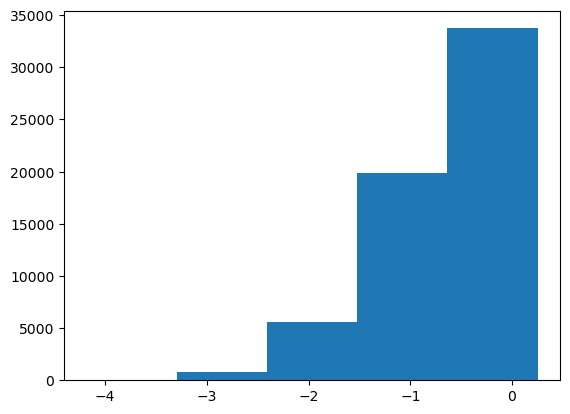

In [35]:
h = plt.hist(np.sort(array)[:ind], bins=5)

In [36]:
"""
Есть вариант проще
"""

np.quantile(array, 0.6)

0.25201853648627304

In [37]:
np.percentile(array, 60)

0.25201853648627304

In [38]:
np.percentile(array, 60)

0.25201853648627304

In [39]:
np.quantile(array, 0.6)

0.25201853648627304

In [40]:
np.nanquantile(array, 0.6)

0.25201853648627304

## 2.Средние, медианы, отклонения

Медиа́на (от лат. mediāna — середина) в математической статистике — число, характеризующее выборку (например, набор чисел). Если все элементы выборки различны, то медиана — это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

<img src="median.jpg">

In [41]:
np.median(array)

-0.002981552864405145

In [42]:
np.quantile(array, 0.5)

-0.002981552864405145

Среднее арифметическое

In [43]:
np.mean(array)

0.0004974809608262239

In [44]:
np.average(array)

0.0004974809608262239

In [45]:
"""
В чем отличие?
Avarage можно брать с весами
"""

arr = np.arange(1,10)
weights = 1/arr

In [46]:
np.average(arr, weights=weights)

3.181371861411138

In [47]:
s = 0
for i,el in enumerate(arr):
    weight = weights[i]
    s+=el*weight
s/=weights.sum()
s

3.181371861411138

In [48]:
"""
Стандартное отклонение
"""

np.std(array)

1.001721797785438

In [49]:
np.var(array)

1.0034465601584899

## Корреляции

In [50]:
a = np.arange(10)
b = a[::-1]

np.corrcoef(a,b)

array([[ 1., -1.],
       [-1.,  1.]])

In [51]:
i = 0
j = 1
matr = np.corrcoef(a,b)
matr[i][j]

-0.9999999999999999

In [56]:
noisy_b = b + np.random.randn(b.shape[0])*b.std()/10

In [57]:
noisy_b

array([9.21313362, 8.13648127, 6.20370281, 5.5953868 , 5.03369224,
       3.77449364, 3.2458442 , 2.16422546, 1.06982666, 0.49788567])

In [58]:
np.corrcoef(a, b + noisy_b)

array([[ 1.      , -0.998359],
       [-0.998359,  1.      ]])

##  Задачи

## Вам дана матрица оценок школьников за все контрольные года по физике
### 1. Найдите  среднюю оценку каждого ученика а) в случае равнозначности оценок б) В случае линейно возрастающей от 0.5 до 1 стоимости оценки с начала года к его концу. Отсортируйте учеников по их оценкам

### 2. Найдите лучшего ученика и узнайте, списывал ли кто-то у него систематически


In [66]:
import pandas as pd
import numpy as np

In [75]:
marks = pd.array(data=[[3, 4, 2, 2, 3, 5, 2, 4, 5, 2, 2, 3, 3, 3, 2],
       [4, 4, 5, 5, 3, 5, 2, 5, 4, 5, 2, 2, 2, 5, 2],
       [5, 3, 5, 5, 3, 4, 5, 4, 4, 3, 5, 2, 5, 3, 3],
       [5, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 4, 4, 5, 5],
       [5, 3, 5, 5, 4, 5, 2, 5, 4, 2, 3, 2, 4, 4, 2],
       [2, 3, 5, 5, 5, 2, 3, 5, 5, 4, 4, 4, 4, 5, 4],
       [4, 3, 5, 5, 4, 4, 4, 2, 5, 2, 4, 3, 5, 5, 2],
       [4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4],
       [3, 5, 4, 5, 5, 2, 2, 3, 5, 5, 5, 2, 3, 4, 3],
       [2, 4, 5, 2, 4, 4, 4, 2, 3, 5, 2, 5, 4, 3, 3],
       [5, 5, 2, 3, 4, 3, 2, 5, 5, 2, 3, 3, 4, 3, 2],
       [3, 5, 5, 4, 2, 3, 4, 4, 3, 5, 4, 4, 5, 3, 2],
       [4, 5, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 5, 3, 3],
       [3, 3, 2, 3, 3, 5, 3, 3, 4, 4, 2, 5, 2, 2, 5],
       [3, 3, 2, 4, 3, 5, 2, 5, 2, 4, 3, 2, 4, 2, 4],
       [2, 5, 5, 4, 2, 3, 3, 3, 4, 3, 4, 2, 5, 4, 3],
       [4, 5, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3],
       [4, 3, 5, 2, 4, 2, 3, 4, 2, 5, 4, 5, 2, 2, 3],
       [4, 2, 3, 3, 3, 4, 3, 3, 3, 4, 4, 5, 3, 5, 2],
       [2, 3, 4, 2, 3, 2, 4, 2, 4, 4, 3, 4, 3, 2, 5],
       [5, 4, 3, 4, 5, 2, 2, 2, 2, 5, 2, 2, 4, 2, 4],
       [4, 4, 4, 5, 4, 5, 5, 2, 5, 3, 2, 2, 3, 3, 2],
       [3, 3, 4, 2, 2, 5, 2, 4, 2, 2, 4, 4, 5, 3, 3],
       [5, 5, 2, 4, 5, 2, 2, 3, 4, 4, 5, 2, 5, 5, 3],
       [3, 5, 4, 5, 2, 5, 3, 3, 4, 2, 5, 4, 2, 3, 4],
       [4, 3, 3, 4, 5, 3, 2, 4, 2, 4, 4, 2, 5, 3, 5],
       [4, 5, 5, 3, 5, 4, 3, 4, 4, 5, 3, 3, 5, 3, 4],
       [4, 3, 5, 5, 4, 4, 2, 3, 4, 4, 5, 3, 3, 2, 5],
       [2, 3, 4, 4, 5, 4, 2, 3, 5, 4, 3, 3, 5, 3, 4],
       [5, 5, 2, 2, 3, 4, 5, 5, 5, 2, 2, 4, 3, 5, 3]], dtype=np.int64)

In [76]:
marks

<NumpyExtensionArray>
[
[3, 4, 2, 2, 3, 5, 2, 4, 5, 2, 2, 3, 3, 3, 2],
[4, 4, 5, 5, 3, 5, 2, 5, 4, 5, 2, 2, 2, 5, 2],
[5, 3, 5, 5, 3, 4, 5, 4, 4, 3, 5, 2, 5, 3, 3],
[5, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 4, 4, 5, 5],
[5, 3, 5, 5, 4, 5, 2, 5, 4, 2, 3, 2, 4, 4, 2],
[2, 3, 5, 5, 5, 2, 3, 5, 5, 4, 4, 4, 4, 5, 4],
[4, 3, 5, 5, 4, 4, 4, 2, 5, 2, 4, 3, 5, 5, 2],
[4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4],
[3, 5, 4, 5, 5, 2, 2, 3, 5, 5, 5, 2, 3, 4, 3],
[2, 4, 5, 2, 4, 4, 4, 2, 3, 5, 2, 5, 4, 3, 3],
[5, 5, 2, 3, 4, 3, 2, 5, 5, 2, 3, 3, 4, 3, 2],
[3, 5, 5, 4, 2, 3, 4, 4, 3, 5, 4, 4, 5, 3, 2],
[4, 5, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 5, 3, 3],
[3, 3, 2, 3, 3, 5, 3, 3, 4, 4, 2, 5, 2, 2, 5],
[3, 3, 2, 4, 3, 5, 2, 5, 2, 4, 3, 2, 4, 2, 4],
[2, 5, 5, 4, 2, 3, 3, 3, 4, 3, 4, 2, 5, 4, 3],
[4, 5, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3],
[4, 3, 5, 2, 4, 2, 3, 4, 2, 5, 4, 5, 2, 2, 3],
[4, 2, 3, 3, 3, 4, 3, 3, 3, 4, 4, 5, 3, 5, 2],
[2, 3, 4, 2, 3, 2, 4, 2, 4, 4, 3, 4, 3, 2, 5],
[5, 4, 3, 4, 5, 2, 2, 2, 2, 5, 2, 2,

In [77]:
np.argmax(np.mean(marks, axis=1))

7

In [84]:
best_student = np.argmax(np.mean(marks, axis=1))
best_student

7

In [79]:
matr = np.corrcoef(marks)

In [80]:
matr[i]

array([ 1.        ,  0.29801978, -0.19408094, -0.27116307,  0.37888611,
       -0.1875    ,  0.05828155,  0.38816188, -0.10928255, -0.05936696,
        0.67763093, -0.19408094,  0.26969811,  0.30376574,  0.1851993 ,
        0.        ,  0.23836565, -0.39800147,  0.        , -0.33730442,
       -0.31693285,  0.28139073,  0.2469324 ,  0.        ,  0.17877424,
       -0.31513718,  0.15811388, -0.25877458,  0.2033723 ,  0.621059  ])

In [81]:
students_cor = np.argsort(matr[i])

In [82]:
students_cor

array([17, 19, 20, 25,  3, 27,  2, 11,  5,  8,  9, 15, 23, 18,  6, 26, 24,
       14, 28, 16, 22, 12, 21,  1, 13,  4,  7, 29, 10,  0], dtype=int64)